1. What is a random variable in probability theory?
A variable that assigns a real number to each outcome of a random experiment.

2. What are the types of random variables?

Discrete Random Variable – takes countable values.

Continuous Random Variable – takes infinite, uncountable values within a range.

3. What is the difference between discrete and continuous distributions?

Discrete: Probabilities assigned to specific values.

Continuous: Probabilities assigned over intervals, not specific values.

4. What are probability distribution functions (PDF)?
For continuous variables, a PDF describes the likelihood of a variable falling within a range; the area under the curve gives probability.

5. How do cumulative distribution functions (CDF) differ from PDF?

CDF: Gives probability that a variable ≤ a certain value.

PDF: Gives the relative likelihood of the variable near a point.

6. What is a discrete uniform distribution?
A distribution where all outcomes have equal probability, e.g., rolling a fair die.

7. What are the key properties of a Bernoulli distribution?

Two outcomes: success (1) and failure (0)

One trial

Mean = p, Variance = p(1−p)

8. What is the binomial distribution, and how is it used in probability?
Describes the number of successes in n independent Bernoulli trials with probability p of success.

9. What is the Poisson distribution and where is it applied?
Describes the number of events occurring in a fixed interval with a known constant mean rate (e.g., calls per hour).

10. What is a continuous uniform distribution?
All values within a specific range are equally likely, e.g., time between 2 and 5 minutes.

11. What are the characteristics of a normal distribution?

Symmetrical, bell-shaped curve

Mean = median = mode

Defined by mean (μ) and standard deviation (σ)

12. What is the standard normal distribution, and why is it important?
A normal distribution with μ = 0 and σ = 1; used for calculating Z-scores and standardizing values.

13. What is the Central Limit Theorem (CLT), and why is it critical in statistics?
States that the sampling distribution of the sample mean approaches normality as sample size increases, regardless of original distribution.

14. How does the Central Limit Theorem relate to the normal distribution?
It justifies using the normal distribution to approximate sampling distributions for inference.

15. What is the application of Z statistics in hypothesis testing?
Used to compare a sample mean to a known population mean when population variance is known.

16. How do you calculate a Z-score, and what does it represent?
Z = (X − μ) / σ
It represents how many standard deviations X is from the mean.

17. What are point estimates and interval estimates in statistics?

Point estimate: Single value estimate (e.g., sample mean).

Interval estimate: Range (e.g., confidence interval) likely to contain the true value.

18. What is the significance of confidence intervals in statistical analysis?
Provides a range where the true parameter is likely to fall, with a specified level of confidence (e.g., 95%).

19. What is the relationship between a Z-score and a confidence interval?
Z-scores define the margin of error in a confidence interval (e.g., ±1.96 for 95% confidence).

20. How are Z-scores used to compare different distributions?
By standardizing values from different distributions, Z-scores allow direct comparison.

21. What are the assumptions for applying the Central Limit Theorem?

Independent, identically distributed (i.i.d.) samples

Sample size should be large (n ≥ 30 is a rule of thumb)

22. What is the concept of expected value in a probability distribution?
The long-run average value of repetitions of the experiment:
E(X) = Σ [x × P(x)] for discrete,
E(X) = ∫ x·f(x) dx for continuous.

23. How does a probability distribution relate to the expected outcome of a random variable?
It provides the weights (probabilities) for computing the expected value—the average outcome over many trials.



In [3]:
# 1. Generate a random variable and display its value

import numpy as np

rv = np.random.randint(1, 100)
print("Random Variable:", rv)


Random Variable: 67


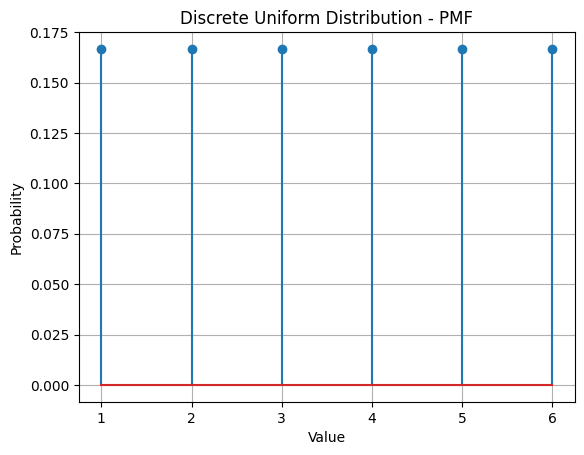

In [5]:
import numpy as np
import matplotlib.pyplot as plt

values = np.arange(1, 7)
probs = np.full_like(values, 1/len(values), dtype=float)

plt.stem(values, probs)  # Removed use_line_collection
plt.title("Discrete Uniform Distribution - PMF")
plt.xlabel("Value")
plt.ylabel("Probability")
plt.grid(True)
plt.show()


In [6]:
def bernoulli_pdf(p, x):
    return p**x * (1 - p)**(1 - x)

print("Bernoulli PDF for p=0.6, x=1:", bernoulli_pdf(0.6, 1))
print("Bernoulli PDF for p=0.6, x=0:", bernoulli_pdf(0.6, 0))


Bernoulli PDF for p=0.6, x=1: 0.6
Bernoulli PDF for p=0.6, x=0: 0.4


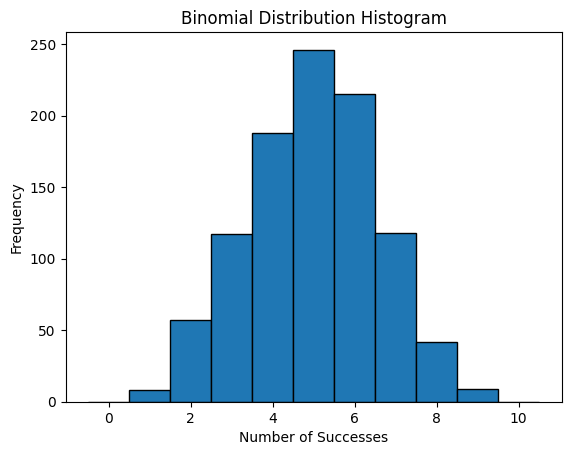

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n, p = 10, 0.5
data = binom.rvs(n, p, size=1000)

plt.hist(data, bins=np.arange(-0.5, n+1.5, 1), edgecolor='black')
plt.title("Binomial Distribution Histogram")
plt.xlabel("Number of Successes")
plt.ylabel("Frequency")
plt.show()


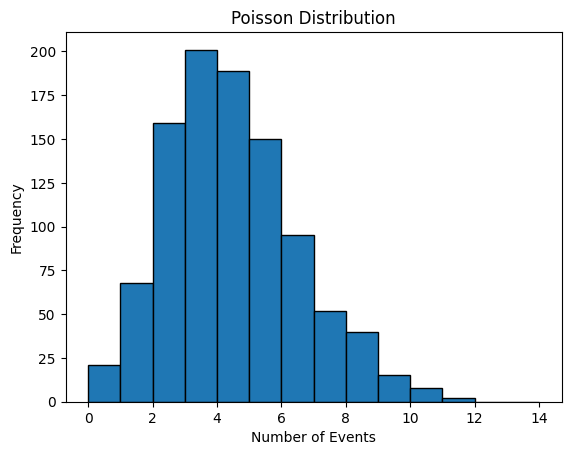

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

mu = 4
data = poisson.rvs(mu, size=1000)

plt.hist(data, bins=range(0, 15), edgecolor='black')
plt.title("Poisson Distribution")
plt.xlabel("Number of Events")
plt.ylabel("Frequency")
plt.show()


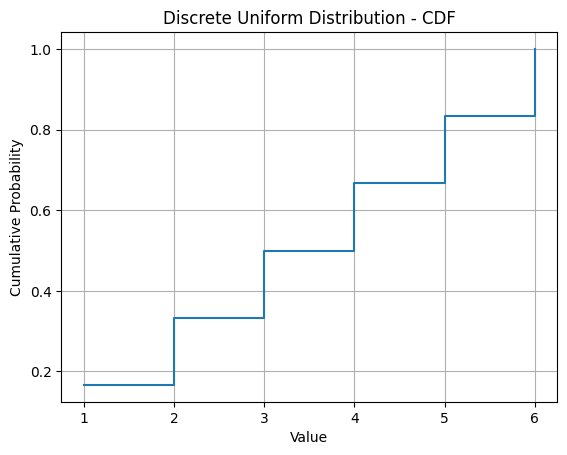

In [10]:
import numpy as np
import matplotlib.pyplot as plt

values = np.arange(1, 7)
probs = np.full_like(values, 1/len(values), dtype=float)
cdf_vals = np.cumsum(probs)

plt.step(values, cdf_vals, where='post')
plt.title("Discrete Uniform Distribution - CDF")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.grid(True)
plt.show()


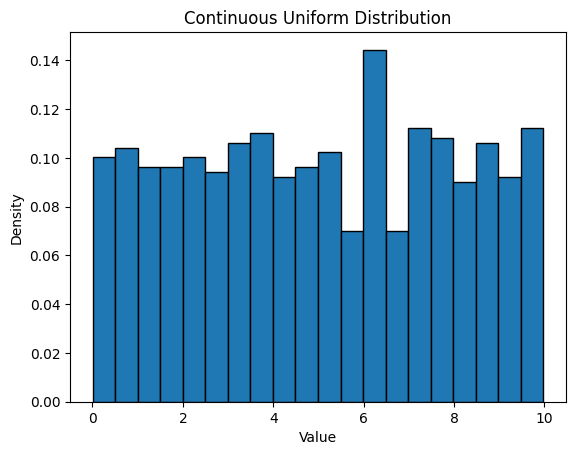

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

data = uniform.rvs(loc=0, scale=10, size=1000)

plt.hist(data, bins=20, edgecolor='black', density=True)
plt.title("Continuous Uniform Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()


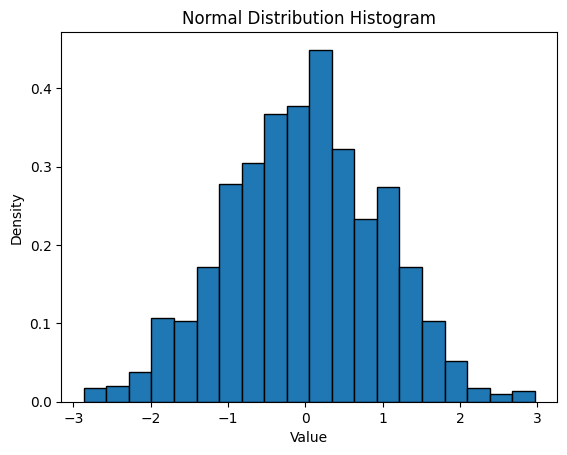

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

data = norm.rvs(loc=0, scale=1, size=1000)

plt.hist(data, bins=20, edgecolor='black', density=True)
plt.title("Normal Distribution Histogram")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()



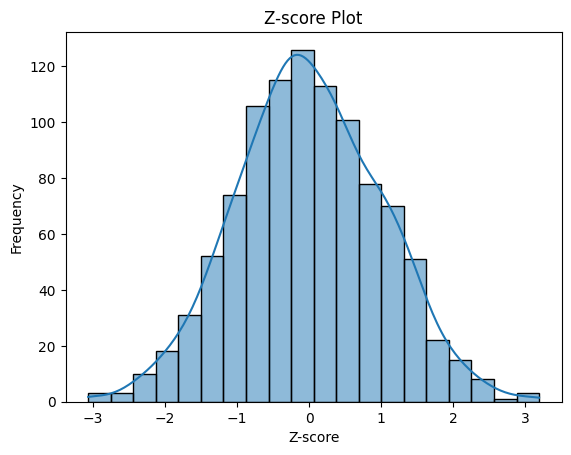

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

data = np.random.normal(loc=50, scale=10, size=1000)
z_scores = zscore(data)

sns.histplot(z_scores, bins=20, kde=True)
plt.title("Z-score Plot")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.show()


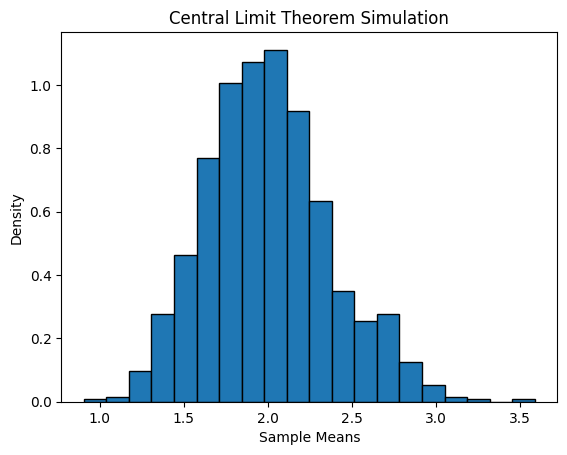

In [14]:
import numpy as np
import matplotlib.pyplot as plt

samples = 1000
sample_size = 30
population = np.random.exponential(scale=2.0, size=10000)
means = [np.mean(np.random.choice(population, sample_size)) for _ in range(samples)]

plt.hist(means, bins=20, edgecolor='black', density=True)
plt.title("Central Limit Theorem Simulation")
plt.xlabel("Sample Means")
plt.ylabel("Density")
plt.show()


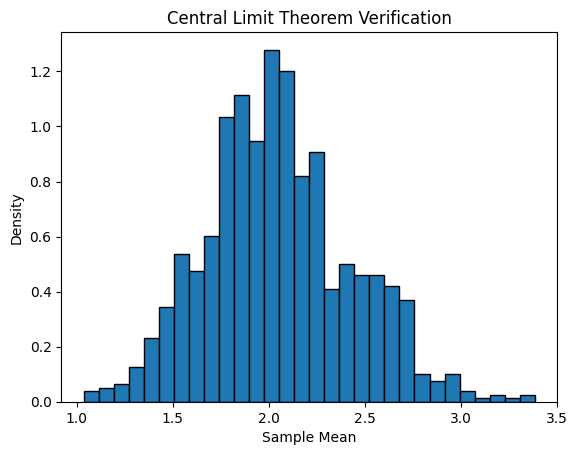

In [15]:
import numpy as np
import matplotlib.pyplot as plt

population = np.random.exponential(scale=2, size=10000)
sample_means = [np.mean(np.random.choice(population, 30)) for _ in range(1000)]

plt.hist(sample_means, bins=30, density=True, edgecolor='black')
plt.title("Central Limit Theorem Verification")
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.show()


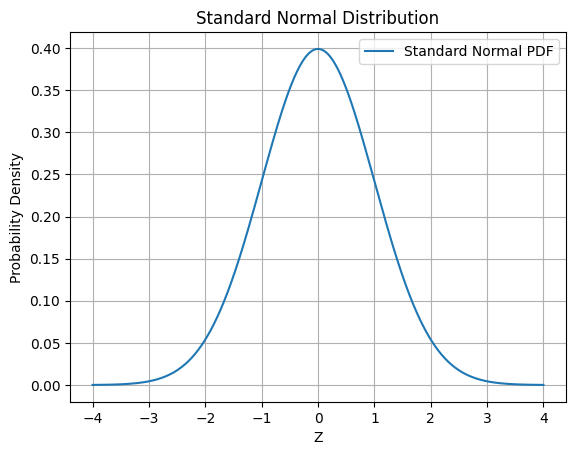

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, loc=0, scale=1)

plt.plot(x, pdf, label="Standard Normal PDF")
plt.title("Standard Normal Distribution")
plt.xlabel("Z")
plt.ylabel("Probability Density")
plt.grid(True)
plt.legend()
plt.show()


In [17]:
from scipy.stats import binom

n, p = 10, 0.5
x = range(n + 1)
probs = binom.pmf(x, n, p)

for xi, pi in zip(x, probs):
    print(f"P(X = {xi}) = {pi:.4f}")


P(X = 0) = 0.0010
P(X = 1) = 0.0098
P(X = 2) = 0.0439
P(X = 3) = 0.1172
P(X = 4) = 0.2051
P(X = 5) = 0.2461
P(X = 6) = 0.2051
P(X = 7) = 0.1172
P(X = 8) = 0.0439
P(X = 9) = 0.0098
P(X = 10) = 0.0010


In [18]:
from scipy.stats import norm

x = 72
mean = 70
std = 5
z = (x - mean) / std
prob = norm.cdf(z)

print("Z-score:", round(z, 2))
print("Probability (P <= x):", round(prob, 4))


Z-score: 0.4
Probability (P <= x): 0.6554


In [19]:
from scipy.stats import norm

# Known population parameters
mu = 100
sigma = 15
sample_mean = 104
n = 30

z = (sample_mean - mu) / (sigma / (n ** 0.5))
p_value = 1 - norm.cdf(z)

print("Z-statistic:", round(z, 2))
print("P-value (right-tailed):", round(p_value, 4))


Z-statistic: 1.46
P-value (right-tailed): 0.0721


In [20]:
import numpy as np
from scipy.stats import norm

data = np.random.normal(50, 10, 100)
mean = np.mean(data)
std = np.std(data, ddof=1)
n = len(data)

z = norm.ppf(0.975)  # 95% confidence
margin = z * std / np.sqrt(n)
ci = (mean - margin, mean + margin)

print("95% Confidence Interval:", ci)


95% Confidence Interval: (np.float64(46.48647481215556), np.float64(49.90189951930657))


In [21]:
import numpy as np
from scipy.stats import norm

data = np.random.normal(50, 10, 100)
mean = np.mean(data)
std = np.std(data, ddof=1)
n = len(data)

z = norm.ppf(0.975)  # 95% confidence
margin = z * std / np.sqrt(n)
ci = (mean - margin, mean + margin)

print("95% Confidence Interval:", ci)


95% Confidence Interval: (np.float64(48.39253771553648), np.float64(52.169217425169236))


In [22]:
import numpy as np
from scipy.stats import norm

data = np.random.normal(loc=60, scale=8, size=100)
mean = np.mean(data)
std = np.std(data, ddof=1)
n = len(data)

z = norm.ppf(0.975)
margin = z * std / np.sqrt(n)
ci = (mean - margin, mean + margin)

print("Mean:", mean)
print("95% Confidence Interval:", ci)


Mean: 60.569056770219106
95% Confidence Interval: (np.float64(59.00413862825416), np.float64(62.13397491218405))


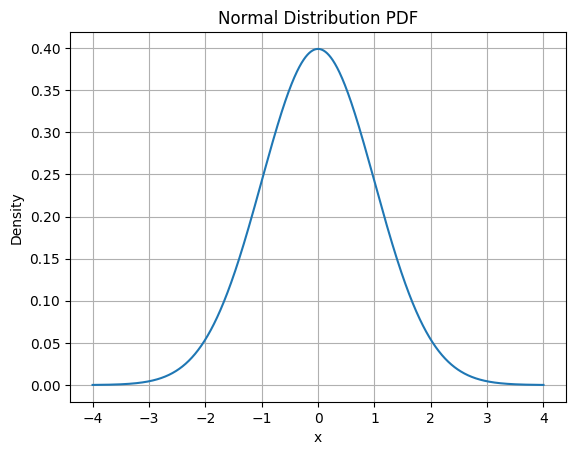

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x)

plt.plot(x, pdf)
plt.title("Normal Distribution PDF")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [24]:
from scipy.stats import poisson

mu = 3
x = 5
cdf = poisson.cdf(x, mu)

print(f"P(X <= {x}) for Poisson(λ={mu}):", round(cdf, 4))


P(X <= 5) for Poisson(λ=3): 0.9161


In [25]:
import numpy as np
from scipy.stats import uniform

a, b = 5, 15
data = uniform.rvs(loc=a, scale=b-a, size=1000)
expected_value = np.mean(data)

print("Expected Value (approx.):", round(expected_value, 2))


Expected Value (approx.): 9.9


Standard Deviation A: 5.097457127076534
Standard Deviation B: 10.195979493649308


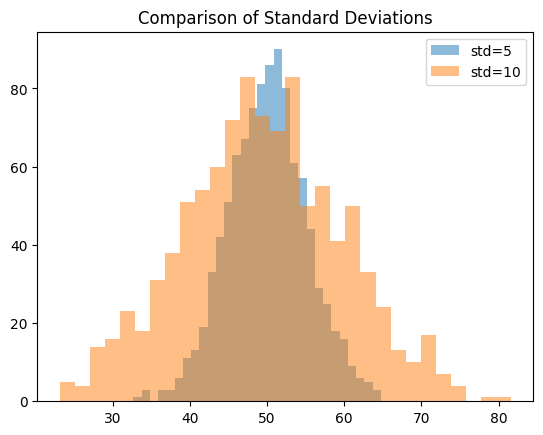

In [26]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.normal(50, 5, 1000)
b = np.random.normal(50, 10, 1000)

std_a = np.std(a)
std_b = np.std(b)

print("Standard Deviation A:", std_a)
print("Standard Deviation B:", std_b)

plt.hist(a, bins=30, alpha=0.5, label='std=5')
plt.hist(b, bins=30, alpha=0.5, label='std=10')
plt.title("Comparison of Standard Deviations")
plt.legend()
plt.show()


In [27]:
import numpy as np
from scipy.stats import iqr

data = np.random.normal(100, 15, 1000)
range_val = np.ptp(data)
iqr_val = iqr(data)

print("Range:", round(range_val, 2))
print("Interquartile Range (IQR):", round(iqr_val, 2))


Range: 98.17
Interquartile Range (IQR): 19.42


In [28]:
import numpy as np
from scipy.stats import skew, kurtosis

data = np.random.normal(loc=0, scale=1, size=1000)

print("Skewness:", round(skew(data), 4))
print("Kurtosis:", round(kurtosis(data), 4))  # excess kurtosis


Skewness: 0.0222
Kurtosis: 0.2792
